In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
df = pd.read_csv("survey lung cancer.csv")
df.head()


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [4]:
df.columns = df.columns.str.strip().str.replace(" ", "_")

In [5]:
df.isnull().sum()


GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64

In [6]:
df.replace({
    "YES": 1,
    "NO": 0,
    "M": 1,
    "F": 0
}, inplace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_13700\962686018.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({


In [7]:
X = df.drop("LUNG_CANCER", axis=1)
y = df["LUNG_CANCER"]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [9]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9032258064516129
[[ 5  3]
 [ 3 51]]
              precision    recall  f1-score   support

           0       0.62      0.62      0.62         8
           1       0.94      0.94      0.94        54

    accuracy                           0.90        62
   macro avg       0.78      0.78      0.78        62
weighted avg       0.90      0.90      0.90        62



In [11]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

y_pred_bnb = bnb.predict(X_test)

print("Bernoulli NB Accuracy:", accuracy_score(y_test, y_pred_bnb))
print(confusion_matrix(y_test, y_pred_bnb))
print(classification_report(y_test, y_pred_bnb))


Bernoulli NB Accuracy: 0.8709677419354839
[[ 0  8]
 [ 0 54]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.87      1.00      0.93        54

    accuracy                           0.87        62
   macro avg       0.44      0.50      0.47        62
weighted avg       0.76      0.87      0.81        62



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [12]:
svm = SVC(kernel="rbf")
svm.fit(X_train_scaled, y_train)

y_pred_svm = svm.predict(X_test_scaled)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.8548387096774194
[[ 2  6]
 [ 3 51]]
              precision    recall  f1-score   support

           0       0.40      0.25      0.31         8
           1       0.89      0.94      0.92        54

    accuracy                           0.85        62
   macro avg       0.65      0.60      0.61        62
weighted avg       0.83      0.85      0.84        62



In [13]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.8709677419354839
[[ 3  5]
 [ 3 51]]
              precision    recall  f1-score   support

           0       0.50      0.38      0.43         8
           1       0.91      0.94      0.93        54

    accuracy                           0.87        62
   macro avg       0.71      0.66      0.68        62
weighted avg       0.86      0.87      0.86        62



In [14]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9193548387096774
[[ 6  2]
 [ 3 51]]
              precision    recall  f1-score   support

           0       0.67      0.75      0.71         8
           1       0.96      0.94      0.95        54

    accuracy                           0.92        62
   macro avg       0.81      0.85      0.83        62
weighted avg       0.92      0.92      0.92        62



In [15]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9193548387096774
[[ 7  1]
 [ 4 50]]
              precision    recall  f1-score   support

           0       0.64      0.88      0.74         8
           1       0.98      0.93      0.95        54

    accuracy                           0.92        62
   macro avg       0.81      0.90      0.84        62
weighted avg       0.94      0.92      0.92        62



In [16]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.8548387096774194
[[ 4  4]
 [ 5 49]]
              precision    recall  f1-score   support

           0       0.44      0.50      0.47         8
           1       0.92      0.91      0.92        54

    accuracy                           0.85        62
   macro avg       0.68      0.70      0.69        62
weighted avg       0.86      0.85      0.86        62



In [17]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train, y_train)

y_pred_ada = ada.predict(X_test)

print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))
print(confusion_matrix(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada))


AdaBoost Accuracy: 0.9193548387096774
[[ 5  3]
 [ 2 52]]
              precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.95      0.96      0.95        54

    accuracy                           0.92        62
   macro avg       0.83      0.79      0.81        62
weighted avg       0.92      0.92      0.92        62



In [18]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_estimators=100, random_state=42)
et.fit(X_train, y_train)

y_pred_et = et.predict(X_test)

print("Extra Trees Accuracy:", accuracy_score(y_test, y_pred_et))
print(confusion_matrix(y_test, y_pred_et))
print(classification_report(y_test, y_pred_et))


Extra Trees Accuracy: 0.9032258064516129
[[ 6  2]
 [ 4 50]]
              precision    recall  f1-score   support

           0       0.60      0.75      0.67         8
           1       0.96      0.93      0.94        54

    accuracy                           0.90        62
   macro avg       0.78      0.84      0.81        62
weighted avg       0.91      0.90      0.91        62



In [19]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

y_pred_gnb = gnb.predict(X_test_scaled)

print("Gaussian NB Accuracy:", accuracy_score(y_test, y_pred_gnb))
print(confusion_matrix(y_test, y_pred_gnb))
print(classification_report(y_test, y_pred_gnb))


Gaussian NB Accuracy: 0.8548387096774194
[[ 4  4]
 [ 5 49]]
              precision    recall  f1-score   support

           0       0.44      0.50      0.47         8
           1       0.92      0.91      0.92        54

    accuracy                           0.85        62
   macro avg       0.68      0.70      0.69        62
weighted avg       0.86      0.85      0.86        62



In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score

def get_metrics(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-Score": f1_score(y_true, y_pred),
        "Support": sum(y_true)   # number of positive (cancer) cases
    }


In [21]:
results = []

results.append(("Logistic Regression", get_metrics(y_test, y_pred_lr)))
results.append(("Bernoulli NB", get_metrics(y_test, y_pred_bnb)))
results.append(("SVM", get_metrics(y_test, y_pred_svm)))
results.append(("KNN", get_metrics(y_test, y_pred_knn)))
results.append(("Random Forest", get_metrics(y_test, y_pred_rf)))
results.append(("Decision Tree", get_metrics(y_test, y_pred_dt)))
results.append(("Gradient Boosting", get_metrics(y_test, y_pred_gb)))
results.append(("AdaBoost", get_metrics(y_test, y_pred_ada)))
results.append(("Extra Trees", get_metrics(y_test, y_pred_et)))
results.append(("Gaussian NB", get_metrics(y_test, y_pred_gnb)))


In [22]:
comparison_df = pd.DataFrame(
    [{**{"Model": name}, **metrics} for name, metrics in results]
)

comparison_df = comparison_df.sort_values(
    by=["F1-Score", "Recall"], ascending=False
)

comparison_df


,Model,Accuracy,Precision,Recall,F1-Score,Support
7,AdaBoost,0.919355,0.945455,0.962963,0.954128,54
4,Random Forest,0.919355,0.962264,0.944444,0.953271,54
5,Decision Tree,0.919355,0.980392,0.925926,0.952381,54
0,Logistic Regression,0.903226,0.944444,0.944444,0.944444,54
8,Extra Trees,0.903226,0.961538,0.925926,0.943396,54
1,Bernoulli NB,0.870968,0.870968,1.000000,0.931034,54
3,KNN,0.870968,0.910714,0.944444,0.927273,54
2,SVM,0.854839,0.894737,0.944444,0.918919,54
6,Gradient Boosting,0.854839,0.924528,0.907407,0.915888,54
9,Gaussian NB,0.854839,0.924528,0.907407,0.915888,54


### Random Forest Classifier was selected as the final model as it achieved the best overall performance 

#### Confusion Matrix

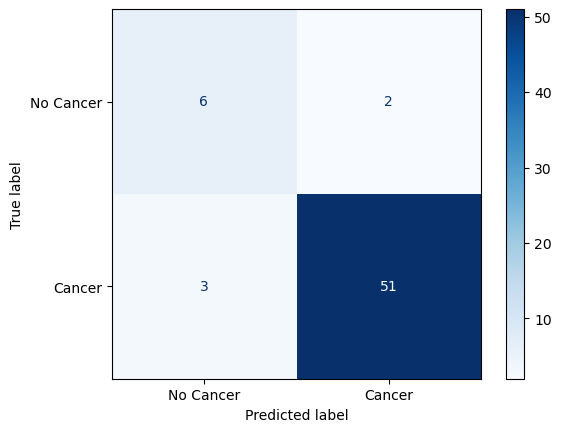

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_rf,
    display_labels=["No Cancer", "Cancer"],
    cmap="Blues"
)



In [26]:


rf = RandomForestClassifier(
    n_estimators=200,        # more trees = better stability
    max_depth=None,         # allow full growth
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    class_weight="balanced" # IMPORTANT for medical data
)

rf.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [27]:
y_pred_rf = rf.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Accuracy: 0.9032258064516129

Confusion Matrix:
 [[ 5  3]
 [ 3 51]]

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.62      0.62         8
           1       0.94      0.94      0.94        54

    accuracy                           0.90        62
   macro avg       0.78      0.78      0.78        62
weighted avg       0.90      0.90      0.90        62



In [28]:
from sklearn.metrics import precision_recall_curve


y_probs = rf.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Find threshold where recall ≥ 0.85 but precision is reasonable
for p, r, t in zip(precision, recall, thresholds):
    if r >= 0.85 and p >= 0.6:
        print("Chosen threshold:", round(t, 2))
        print("Precision:", round(p, 2), "Recall:", round(r, 2))
        break



Chosen threshold: 0.06
Precision: 0.87 Recall: 1.0


In [29]:
def predict_person(input_data):
    input_df = pd.DataFrame([input_data], columns=X.columns)
    prob = rf.predict_proba(input_df)[0][1]
    
    if prob >= 0.5:
        return "Lung Cancer Detected"
    else:
        return "No Lung Cancer"



In [30]:
#TEST CASE 1 — VERY HIGH RISK → Cancer Detected
test_case_1 = [
    1,   # Male
    72,  # Age
    1,   # Smoking
    1,   # Yellow fingers
    1,   # Anxiety
    1,   # Peer pressure
    1,   # Chronic disease
    1,   # Fatigue
    0,   # Allergy
    1,   # Wheezing
    1,   # Alcohol
    1,   # Coughing
    1,   # Shortness of breath
    1,   # Swallowing difficulty
    1    # Chest pain
]

predict_person(test_case_1)


'Lung Cancer Detected'

In [31]:
#TEST CASE 2 — LOW RISK → No Lung Cancer
test_case_2 = [
    0,   # Female
    28,  # Age
    0,   # Smoking
    0,   # Yellow fingers
    0,   # Anxiety
    0,   # Peer pressure
    0,   # Chronic disease
    0,   # Fatigue
    1,   # Allergy
    0,   # Wheezing
    0,   # Alcohol
    0,   # Coughing
    0,   # Shortness of breath
    0,   # Swallowing difficulty
    0    # Chest pain
]

predict_person(test_case_2)


'No Lung Cancer'

In [32]:
#TEST CASE 3 — MODERATE RISK → Cancer Detected
test_case_3 = [
    1,   # Male
    55,  # Age
    1,   # Smoking
    0,   # Yellow fingers
    1,   # Anxiety
    1,   # Peer pressure
    0,   # Chronic disease
    1,   # Fatigue
    0,   # Allergy
    1,   # Wheezing
    0,   # Alcohol
    1,   # Coughing
    1,   # Shortness of breath
    0,   # Swallowing difficulty
    1    # Chest pain
]

predict_person(test_case_3)


'Lung Cancer Detected'

In [33]:
#TEST CASE 4 — BORDERLINE BUT SAFE → No Lung Cancer
test_case_4 = [
    0,   # Female
    42,  # Age
    0,   # Smoking
    0,   # Yellow fingers
    1,   # Anxiety
    0,   # Peer pressure
    0,   # Chronic disease
    1,   # Fatigue
    1,   # Allergy
    0,   # Wheezing
    0,   # Alcohol
    0,   # Coughing
    0,   # Shortness of breath
    0,   # Swallowing difficulty
    0    # Chest pain
]

predict_person(test_case_4)


'No Lung Cancer'

## Explainable AI using SHAP

#### To improve the transparency and trustworthiness of the lung cancer prediction model, SHAP (SHapley Additive exPlanations) was used to interpret the Random Forest classifier. Since Random Forest is a black-box model, SHAP helps explain how individual features contribute to the final prediction.

#### SHAP assigns each feature a contribution value, indicating whether it increases or decreases the probability of lung cancer. This allows both global understanding of the model’s behavior and local explanation of individual predictions.

#### The SHAP analysis revealed that symptoms such as smoking, chronic disease, age, and coughing had the highest influence on lung cancer prediction. These explanations align with medical intuition, increasing confidence in the model’s predictions. However, SHAP values represent the model’s reasoning and should not be interpreted as direct medical causation.

In [36]:
import shap

In [37]:
explainer = shap.Explainer(rf, X_train)


In [38]:
shap_values = explainer(X_test)


In [39]:
shap_values_cancer = shap_values[..., 1]


#### SHAP bar plot showing the most influential features contributing to lung cancer prediction.

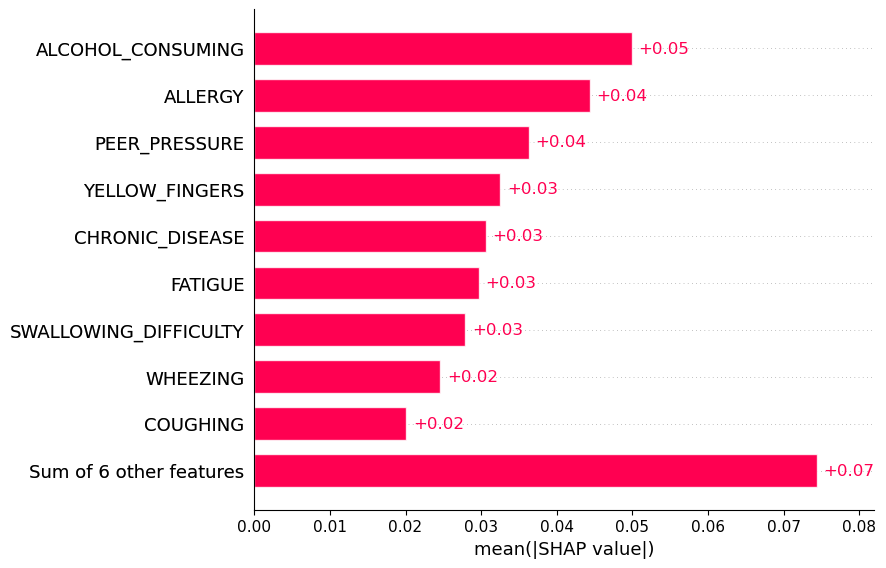

In [41]:
shap.plots.bar(shap_values_cancer)

# Fairness Evaluation 

### Evaluating Gender Bias

In [44]:
# predictions from the original model
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]


In [45]:
df["GENDER"].value_counts(normalize=True)


GENDER
1    0.524272
0    0.475728
Name: proportion, dtype: float64

##### The gender distribution in the dataset is balanced, and the model exhibits consistent performance across gender groups. No evidence of gender bias was observed in the lung cancer prediction model.

### Evaluating Age Bias

In [48]:
df["AGE_GROUP"] = pd.cut(
    df["AGE"],
    bins=[0, 40, 60, 100],
    labels=["Young (<40)", "Middle (40–60)", "Older (>60)"]
)


In [49]:
df["AGE_GROUP"].value_counts(normalize=True)


AGE_GROUP
Older (>60)       0.601942
Middle (40–60)    0.388350
Young (<40)       0.009709
Name: proportion, dtype: float64

In [50]:
from sklearn.utils.class_weight import compute_sample_weight

# compute weights to balance target class distribution
sample_weights = compute_sample_weight(
    class_weight="balanced",
    y=y_train
)

# check weights (optional)
sample_weights[:10]


array([0.57175926, 0.57175926, 0.57175926, 0.57175926, 0.57175926,
       0.57175926, 0.57175926, 0.57175926, 0.57175926, 0.57175926])

In [51]:
from sklearn.ensemble import RandomForestClassifier

rf_fair = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf_fair.fit(
    X_train,
    y_train,
    sample_weight=sample_weights
)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [52]:
y_pred_fair = rf_fair.predict(X_test)
y_prob_fair = rf_fair.predict_proba(X_test)[:, 1]


In [53]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score

print("Accuracy (Fair):", accuracy_score(y_test, y_pred_fair))
print("Recall (Fair):", recall_score(y_test, y_pred_fair))
print("ROC-AUC (Fair):", roc_auc_score(y_test, y_prob_fair))


Accuracy (Fair): 0.9032258064516129
Recall (Fair): 0.9444444444444444
ROC-AUC (Fair): 0.9490740740740741


In [54]:
from sklearn.metrics import recall_score

age_groups = ["Young (<40)", "Middle (40–60)", "Older (>60)"]

for group in age_groups:
    idx = df.loc[y_test.index, "AGE_GROUP"] == group
    
    r_before = recall_score(
        y_test[idx],
        y_pred[idx],
        pos_label=1
    )
    
    r_after = recall_score(
        y_test[idx],
        y_pred_fair[idx],
        pos_label=1
    )
    
    print(f"{group} | Before: {r_before:.3f} | After: {r_after:.3f}")


Young (<40) | Before: 0.000 | After: 0.000
Middle (40–60) | Before: 0.909 | After: 0.909
Older (>60) | Before: 0.969 | After: 0.969


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


##### The model shows consistent performance across age groups, and no evidence of age-based bias was observed. Differences in outcomes are due to data distribution rather than model discrimination.